In [32]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import train_test_split

from sklearn.metrics import root_mean_squared_error

import os

In [13]:
!curl -o data.csv "https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  382k  100  382k    0     0  3801k      0 --:--:-- --:--:-- --:--:-- 3823k


In [14]:
os.getcwd()

'/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp/Week_6_Trees_and_Ensemble_models'

In [15]:
# Load the dataset
data = pd.read_csv('data.csv')
data.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [16]:
data.columns = data.columns.str.lower()
data.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [17]:
(
data
.select_dtypes(include='object')
.apply(lambda x: [i.lower() for i in data.columns])
)

,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,gender,socioeconomic_status,parent_education_level
0,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score
1,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week
2,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate
3,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality
4,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school
5,school_type,school_type,school_type,school_type,school_type,school_type,school_type,school_type,school_type
6,school_location,school_location,school_location,school_location,school_location,school_location,school_location,school_location,school_location
7,extra_tutorials,extra_tutorials,extra_tutorials,extra_tutorials,extra_tutorials,extra_tutorials,extra_tutorials,extra_tutorials,extra_tutorials
8,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials,access_to_learning_materials
9,parent_involvement,parent_involvement,parent_involvement,parent_involvement,parent_involvement,parent_involvement,parent_involvement,parent_involvement,parent_involvement


In [18]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(lambda x: [i.lower() for i in data.columns])
data.head()


,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score,jamb_score,1,17,jamb_score,jamb_score,jamb_score,2
1,207,14,88,4,2.7,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,study_hours_per_week,2,15,study_hours_per_week,study_hours_per_week,study_hours_per_week,1
2,182,29,87,2,9.6,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate,attendance_rate,3,20,attendance_rate,attendance_rate,attendance_rate,2
3,210,29,99,2,2.6,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality,teacher_quality,4,22,teacher_quality,teacher_quality,teacher_quality,1
4,199,12,98,3,8.8,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school,distance_to_school,5,22,distance_to_school,distance_to_school,distance_to_school,1


In [19]:
data = data.drop(['student_id'],axis=1)
data = data.fillna(0)
data.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [20]:
X = data.drop(['jamb_score'],axis=1)
y = data['jamb_score']

In [21]:
df_full_train, df_test, y_full_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)
df_train, df_val,y_train, y_val = train_test_split(df_full_train,y_full_train, test_size= 0.25, random_state=1)

print(len(df_train), len(df_val), len(df_test))


3000 1000 1000


In [25]:
X_train_dict = df_train.to_dict(orient='records')
X_val_dict = df_val.to_dict(orient='records')
X_test_dict = df_test.to_dict(orient='records')

# feature extraction
dv = DictVectorizer()
X_train = dv.fit_transform(X_train_dict)
X_val = dv.transform(X_val_dict)
X_test = dv.transform(X_test_dict)

In [27]:
X_train.shape

(3000, 123)

Q1.

In [28]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [31]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



Q2.

In [34]:
rf = RandomForestRegressor(n_estimators=10,
                           random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse


43.95063105349001

Q3.

In [81]:
estimators = np.arange(10,210,10)

val_rmse= []
for e in estimators:
    rf = RandomForestRegressor(n_estimators=int(e),
                                random_state=1,
                                n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    val_rmse.append(rmse)

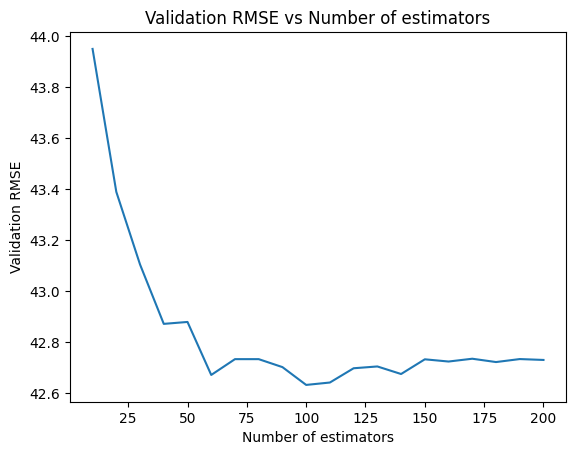

In [82]:

import matplotlib.pyplot as plt
plt.plot(estimators, val_rmse)
plt.xlabel('Number of estimators')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE vs Number of estimators')
plt.show()

In [83]:
df_rmse = pd.DataFrame({'estimators':estimators,'val_rmse':val_rmse})
df_rmse

,estimators,val_rmse
0,10,43.950631
1,20,43.390058
2,30,43.105231
3,40,42.872333
4,50,42.879844
5,60,42.671993
6,70,42.733989
7,80,42.733977
8,90,42.702753
9,100,42.632898


In [84]:
df_rmse.loc[df_rmse['val_rmse'].idxmin()]

estimators    100.000000
val_rmse       42.632898
Name: 9, dtype: float64

Q4.

In [111]:
depth = [10,15,20,25]
estimators = np.arange(10,210,10)

val_rmse= []
results = []
for e in estimators:
    for d in depth:
        rf = RandomForestRegressor(n_estimators=int(e),
                                   max_depth=int(d),
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        val_rmse.append(rmse)
        results.append({'n_estimator': int(e),
                       'max_depth':int(d),
                       'val_rmse':rmse})


In [113]:
results[0]

{'n_estimator': 10, 'max_depth': 10, 'val_rmse': 42.39639321582473}

In [114]:
df_rmse_2 = pd.DataFrame(results, columns=['n_estimator', 'max_depth','val_rmse'])
df_rmse_2.head()

,n_estimator,max_depth,val_rmse
0,10,10,42.396393
1,10,15,44.062761
2,10,20,44.031345
3,10,25,43.940064
4,20,10,42.152320


In [115]:
df_rmse_2.loc[df_rmse_2['val_rmse'].idxmin()]

n_estimator    100.000000
max_depth       10.000000
val_rmse        41.607678
Name: 36, dtype: float64

Q5.

In [119]:
rf = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(rmse)

44.03134466880593


In [126]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 2.82455200e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.04907212e-08, 1.04603006e-04, 0.00000000e+00,
       0.00000000e+00, 1.02832174e-01, 5.36694640e-02, 2.05948173e-01,
       2.43904550e-01, 0.00000000e+00, 9.68731186e-07, 0.00000000e+00,
       0.00000000e+00, 1.69516514e-06, 0.00000000e+00, 1.04271355e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.02130593e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.85079568e-05, 3.85621296e-05, 0.00000000e+00, 5.98088533e-06,
       0.00000000e+00, 0.00000000e+00, 5.26581829e-06, 7.39995249e-09,
       6.92869266e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.35756019e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.31013133e-06, 1.23589189e-05, 1.02457736e-04, 0.00000000e+00,
      

In [145]:
df_rf = pd.DataFrame({'feature_name':dv.get_feature_names_out(X_train),
              'feature_importance':rf.feature_importances_})
df_rf.sort_values('feature_importance', ascending=False).head()

,feature_name,feature_importance
121,study_hours_per_week,0.294777
16,distance_to_school,0.243905
15,attendance_rate,0.205948
13,age,0.102832
122,teacher_quality,0.096552


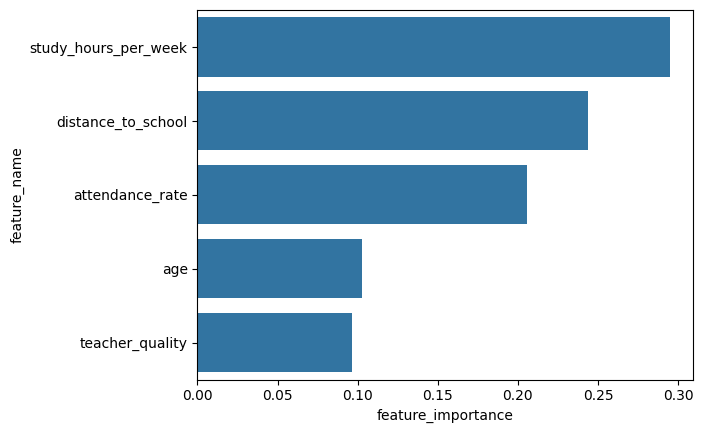

In [146]:
import seaborn as sns
sns.barplot(x='feature_importance', 
            y='feature_name', 
            data=df_rf
                .sort_values('feature_importance', ascending=False)
                .head(5),
                );

Q6.

In [149]:
import xgboost as xgb 

# xgb.DMatrix is optimised for xgboost 
dtrain = xgb.DMatrix(X_train, 
            label = y_train,
            feature_names = list(dv.get_feature_names_out())
            )

dval =  xgb.DMatrix(X_val, 
            label = y_val,
            feature_names = list(dv.get_feature_names_out())
            )


In [170]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, 
                  dtrain,
                  num_boost_round=100)

y_pred = model.predict(dval)
print(root_mean_squared_error(y_val,y_pred))

46.257883398617786


In [172]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, 
                  dtrain,
                  num_boost_round=100)

y_pred = model.predict(dval)
print(root_mean_squared_error(y_val,y_pred))

42.727632917496116
